In [1]:
!pip install praw nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 4.6 MB/s eta 0:00:00


In [7]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [3]:
pip install --upgrade nltk


In [4]:
nltk.download('stopwords')
nltk.download('punkt')

NameError: name 'nltk' is not defined

In [35]:
import praw
import re
import nltk
import csv
from nltk.corpus import stopwords
import pandas as pd  # For saving to CSV
import time

# Download NLTK stopwords (run once)
nltk.download('stopwords')

# Initialize stopwords
stop_words = set(stopwords.words('english'))

# Configure PRAW with your Reddit API credentials
reddit = praw.Reddit(
    client_id='dGZIjyPDfm0AGILS_Cnmmw',
    client_secret='G9x6B53pR-qyMiQABLm-U1CnJO3Spg',
    user_agent='python:stock_scraper:1.0 (by u/MetalMaleficent6947)'
)

# Function to scrape data from a subreddit with pagination support
def scrape_reddit(subreddit_name, limit=1000):
    subreddit = reddit.subreddit(subreddit_name)
    posts = []
    count = 0

    # Scrape posts in batches, adding a time delay to prevent hitting rate limits
    for post in subreddit.new(limit=None):  # Fetches all available posts
        if count >= limit:
            break
        posts.append({
            'title': post.title,
            'selftext': post.selftext,
            'score': post.score,
            'created_utc': post.created_utc
        })
        count += 1

        # Delay to prevent rate limiting
        time.sleep(1)  # Adjust the delay as needed (e.g., 1 second)

    return posts

# Text preprocessing function
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'\W+|\d+', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text_tokens = text.split()
    text_tokens = [word for word in text_tokens if word not in stop_words]
    # Rejoin tokens
    return ' '.join(text_tokens)

# Save data to a CSV file
def save_to_csv(data, filename):
    # Convert list of dictionaries to DataFrame
    df = pd.DataFrame(data)
    # Save DataFrame to CSV
    df.to_csv(filename, index=False)
    print(f"Data saved to {filename}")

# Example usage
if __name__ == "__main__":
    # Scrape a larger number of posts from a subreddit (e.g., r/wallstreetbets)
    scraped_data = scrape_reddit(subreddit_name="wallstreetbets", limit=1000)

    # Preprocess the title and selftext of each post
    for post in scraped_data:
        post['cleaned_title'] = preprocess_text(post['title'])
        post['cleaned_selftext'] = preprocess_text(post['selftext'])

    # Save the processed data to a CSV file
    save_to_csv(scraped_data, "/content/drive/MyDrive/Intern/reddit_scraped_data.csv")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info

Data saved to /content/drive/MyDrive/Intern/reddit_scraped_data.csv


In [14]:
import nltk

# Ensure the 'punkt' tokenizer is downloaded
nltk.download('punkt')

# Ensure 'stopwords' is also downloaded
nltk.download('stopwords')

# Verify the 'punkt' data is in the right location
from nltk.data import find
try:
    find('tokenizers/punkt')
    print("punkt is installed and available.")
except:
    print("punkt is not found, downloading...")
    nltk.download('punkt')


punkt is installed and available.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Processed DataFrame:
                                                text  \
0  Tesla stock is going to skyrocket! Buy $TSLA n...   
1  Not sure about the tech sector. $AAPL might di...   
2  Stock markets looking stable. $GOOGL and $MSFT...   
3  Big news for $AMZN, record-breaking sales this...   

                             cleaned_text  positive  neutral  negative  \
0         tesla stock going skyrocket buy     0.000    1.000       0.0   
1              sure tech sector might dip     0.365    0.635       0.0   
2  stock markets looking stable good bets     0.560    0.440       0.0   
3   big news recordbreaking sales quarter     0.000    1.000       0.0   

  sentiment_label  
0         Neutral  
1        Positive  
2        Positive  
3         Neutral  

Topics Identified:
Topic 1: going, sure, tech, dip, sector
Topic 2: news, sales, big, quarter, recordbreaking

Processed DataFrame:
                                                text          tickers  \
0  Tesla stock is go

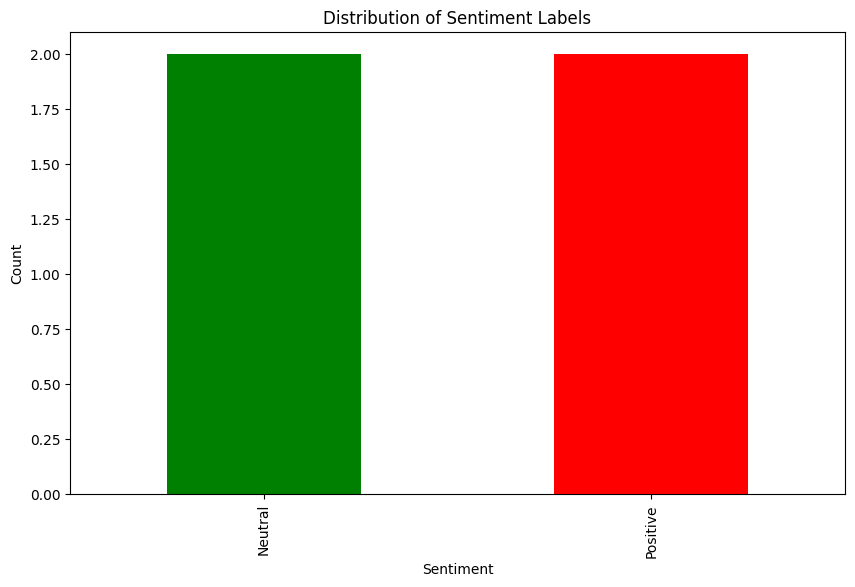

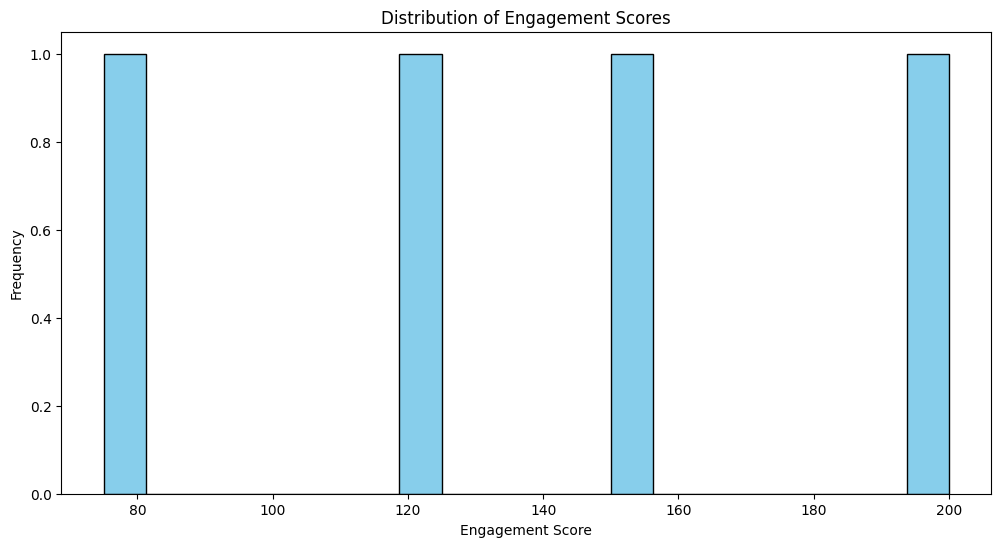

In [36]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter
import nltk
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('stopwords')

# Initialize stopwords and sentiment analyzer
stop_words = set(stopwords.words('english'))
analyzer = SentimentIntensityAnalyzer()

# Example dataset
data = [
    {"text": "Tesla stock is going to skyrocket! Buy $TSLA now! 🚀🚀", "engagement": 120},
    {"text": "Not sure about the tech sector. $AAPL might dip further.", "engagement": 75},
    {"text": "Stock markets looking stable. $GOOGL and $MSFT are good bets.", "engagement": 200},
    {"text": "Big news for $AMZN, record-breaking sales this quarter!", "engagement": 150}
]

df = pd.DataFrame(data)

# Preprocessing text
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove stock tickers (analyze separately)
    text = re.sub(r'\$[A-Za-z]+', '', text)
    # Remove punctuation and numbers, normalize case
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_text)

# a. Sentiment Analysis
def analyze_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

df['sentiment'] = df['cleaned_text'].apply(analyze_sentiment)

# Extract sentiment polarity scores
df['positive'] = df['sentiment'].apply(lambda x: x['pos'])
df['neutral'] = df['sentiment'].apply(lambda x: x['neu'])
df['negative'] = df['sentiment'].apply(lambda x: x['neg'])

# Determine the overall sentiment label
def sentiment_label(row):
    if row['positive'] > row['negative']:
        return 'Positive'
    elif row['negative'] > row['positive']:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df.apply(sentiment_label, axis=1)

# Print processed DataFrame
print("\nProcessed DataFrame:")
print(df[['text', 'cleaned_text', 'positive', 'neutral', 'negative', 'sentiment_label']])

# b. Topic Modeling
def perform_topic_modeling(texts, num_topics=2, num_words=5):
    vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(texts)
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(tfidf_matrix)
    topics = []
    for idx, topic in enumerate(lda.components_):
        topic_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-num_words:]]
        topics.append(f"Topic {idx+1}: {', '.join(topic_words)}")
    return topics

topics = perform_topic_modeling(df['cleaned_text'])
print("\nTopics Identified:")
for topic in topics:
    print(topic)

# c. Feature Extraction
# Frequency Analysis (mention counts)
def extract_tickers(text):
    return re.findall(r'\$[A-Za-z]+', text)

df['tickers'] = df['text'].apply(extract_tickers)
ticker_counts = Counter([ticker for tickers in df['tickers'] for ticker in tickers])

# Engagement Metrics (weighted sentiment)
df['engagement_weighted_sentiment'] = (df['positive'] - df['negative']) * df['engagement']

# Displaying final results
print("\nProcessed DataFrame:")
print(df[['text', 'tickers', 'positive', 'neutral', 'negative', 'sentiment_label', 'engagement_weighted_sentiment']])

# Most Mentioned Tickers
print("\nMost Mentioned Tickers:")
for ticker, count in ticker_counts.most_common():
    print(f"{ticker}: {count}")

# Display engagement analysis summary
print("\nEngagement Analysis Summary:")
df['engagement_weighted_sentiment'] = df['engagement_weighted_sentiment'].round(2)
print(df[['text', 'engagement', 'engagement_weighted_sentiment']].sort_values(by='engagement_weighted_sentiment', ascending=False))

# Data visualization (optional)
plt.figure(figsize=(10, 6))
df['sentiment_label'].value_counts().plot(kind='bar', color=['green', 'red', 'grey'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
df['engagement'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Engagement Scores')
plt.xlabel('Engagement Score')
plt.ylabel('Frequency')
plt.show()


Class distribution in y_train:
stock_price
0    1
1    1
Name: count, dtype: int64
Dataset is too small for cross-validation. Skipping GridSearchCV for Random Forest.
Dataset is too small for cross-validation. Skipping GridSearchCV for Gradient Boosting.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step

Random Forest Evaluation:
Accuracy: 0.5
Precision: 1.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC: 0.5
Confusion Matrix:
[[1 0]
 [1 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Gradient Boosting Evaluation:
Accuracy: 0.5
Precision: 1.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC: 0.5
Confusion Matrix:
[[1 0]
 [1 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


LSTM Evaluation:
Accuracy: 0.5
Precision: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

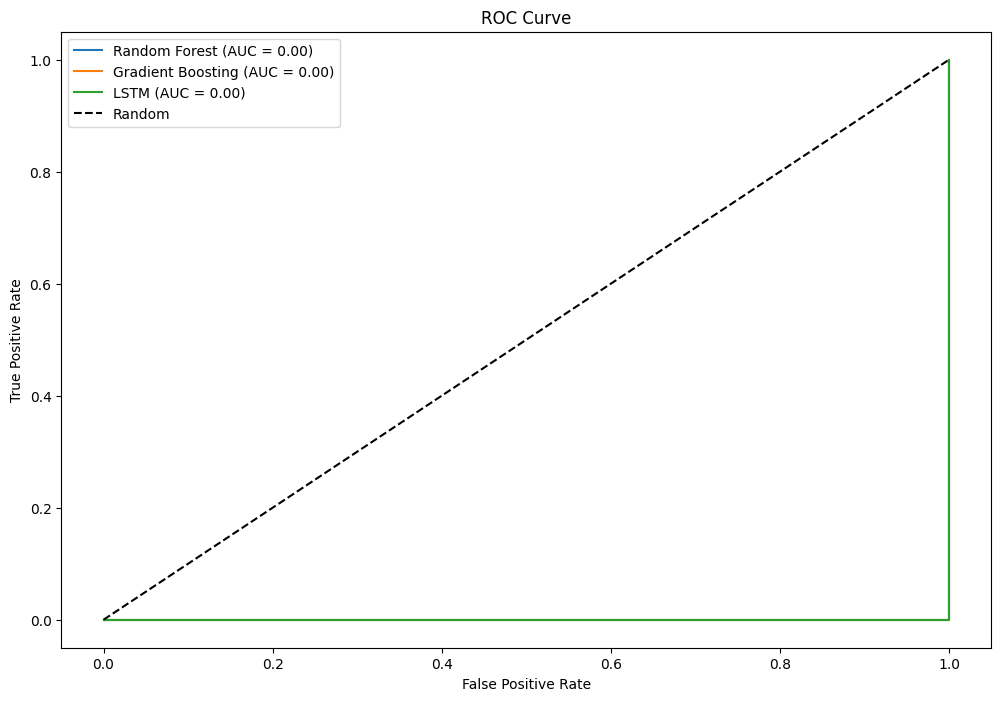


Baseline Accuracy: 0.5


In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             classification_report, roc_auc_score, confusion_matrix, roc_curve, auc)
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Assume X and y are defined (replace this with actual dataset loading)
# X = ...
# y = ...

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check class distribution
class_counts = y_train.value_counts()
print("Class distribution in y_train:")
print(class_counts)

# Model 2: Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

# Adjust for small datasets
if class_counts.min() < 2 or len(y_train) < 5:
    print("Dataset is too small for cross-validation. Skipping GridSearchCV for Random Forest.")
    rf.fit(X_train, y_train)
    rf_best = rf
else:
    grid_search_rf = GridSearchCV(
        rf, param_grid_rf,
        cv=StratifiedKFold(n_splits=2, shuffle=True, random_state=42),
        scoring='accuracy'
    )
    grid_search_rf.fit(X_train, y_train)
    rf_best = grid_search_rf.best_estimator_

y_pred_rf = rf_best.predict(X_test)

# Model 3: Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Adjust for small datasets
if class_counts.min() < 2 or len(y_train) < 5:
    print("Dataset is too small for cross-validation. Skipping GridSearchCV for Gradient Boosting.")
    gb.fit(X_train, y_train)
    gb_best = gb
else:
    grid_search_gb = GridSearchCV(
        gb, param_grid_gb,
        cv=StratifiedKFold(n_splits=2, shuffle=True, random_state=42),
        scoring='accuracy'
    )
    grid_search_gb.fit(X_train, y_train)
    gb_best = grid_search_gb.best_estimator_

y_pred_gb = gb_best.predict(X_test)

# Model 4: LSTM Model (Time-Series)
scaler_lstm = MinMaxScaler()
X_train_reshaped = scaler_lstm.fit_transform(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = scaler_lstm.transform(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit LSTM model with appropriate epochs and batch size for small data
epochs = 5 if len(y_train) > 10 else 3
batch_size = 2 if len(y_train) > 10 else 1
lstm_model.fit(X_train_reshaped, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

# Predict using the LSTM model
y_pred_lstm = (lstm_model.predict(X_test_reshaped) > 0.5).astype(int)

# Model Evaluation Function
def evaluate_model(y_true, y_pred, model_name='Model'):
    print(f'\n{model_name} Evaluation:')
    print('Accuracy:', accuracy_score(y_true, y_pred))
    print('Precision:', precision_score(y_true, y_pred, zero_division=1))
    print('Recall:', recall_score(y_true, y_pred, zero_division=1))
    print('F1 Score:', f1_score(y_true, y_pred, zero_division=1))
    try:
        print('ROC-AUC:', roc_auc_score(y_true, y_pred))
    except ValueError:
        print('ROC-AUC: Not applicable for this data.')
    print('Confusion Matrix:')
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))

# Evaluate all models
evaluate_model(y_test, y_pred_rf, 'Random Forest')
evaluate_model(y_test, y_pred_gb, 'Gradient Boosting')
evaluate_model(y_test, y_pred_lstm, 'LSTM')

# Visualize ROC Curve for all models
plt.figure(figsize=(12, 8))
models = [
    ('Random Forest', rf_best, X_test, 'predict_proba', 1),
    ('Gradient Boosting', gb_best, X_test, 'predict_proba', 1),
    ('LSTM', lstm_model, X_test_reshaped, 'predict', 0)
]

for model_name, model, X_data, predict_method, index in models:
    if predict_method == 'predict_proba':
        fpr, tpr, _ = roc_curve(y_test, getattr(model, predict_method)(X_data)[:, index])
    else:
        fpr, tpr, _ = roc_curve(y_test, getattr(model, predict_method)(X_data))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Compare results with baseline
baseline_accuracy = np.mean(y_test == np.random.randint(0, 2, len(y_test)))
print("\nBaseline Accuracy:", baseline_accuracy)


In [34]:
import joblib

# Save the Random Forest model
joblib.dump(rf_best, 'random_forest_model.pkl')

# Save the Gradient Boosting model
joblib.dump(gb_best, 'gradient_boosting_model.pkl')

# Save the LSTM model
lstm_model.save('/content/drive/MyDrive/Intern/lstm_model.h5')

print("Models have been saved successfully.")


Models have been saved successfully.
